## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 11.09.2021

Мягкий дедлайн: 23:59MSK 25.09.2021

Жесткий дедлайн: 23:59MSK 28.09.2021

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченыным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
# !brew install sl && sl -la

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
% pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Скачаем данные:

In [4]:
# !wget  -O './end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [5]:
# !powershell iwr -outf somefile https://somesite/somefile

In [6]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [247]:
df = pd.read_excel("./end_seminar.xlsx")

In [248]:
from pprint import pprint

pprint(df.shape)
pprint([*df.columns])

(361, 16)
['timestamp',
 'id',
 'rating',
 '18_group',
 'is_mi',
 'fall_1',
 'fall_2',
 'fall_3',
 'spring_1',
 'spring_2',
 'spring_3',
 'is_first_time',
 'percentile',
 '17_group',
 'blended',
 'is_ml_student']


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      361 non-null    datetime64[ns]
 1   id             361 non-null    object        
 2   rating         361 non-null    int64         
 3   18_group       223 non-null    float64       
 4   is_mi          18 non-null     float64       
 5   fall_1         361 non-null    object        
 6   fall_2         361 non-null    object        
 7   fall_3         361 non-null    object        
 8   spring_1       361 non-null    object        
 9   spring_2       361 non-null    object        
 10  spring_3       361 non-null    object        
 11  is_first_time  359 non-null    object        
 12  percentile     361 non-null    float64       
 13  17_group       138 non-null    float64       
 14  blended        138 non-null    object        
 15  is_ml_student  57 non-n

In [250]:
df.describe()

,rating,18_group,is_mi,percentile,17_group,is_ml_student
count,361.000000,223.000000,18.0,361.000000,138.000000,57.0
mean,833.346260,184.520179,1.0,0.497230,173.355072,1.0
std,266.665103,2.271701,0.0,0.289071,1.795374,0.0
min,495.000000,181.000000,1.0,0.000000,171.000000,1.0
25%,613.000000,183.000000,1.0,0.246637,172.000000,1.0
50%,697.000000,185.000000,1.0,0.497758,173.000000,1.0
75%,1111.000000,187.000000,1.0,0.746377,175.000000,1.0
max,1457.000000,188.000000,1.0,0.995516,177.000000,1.0


In [251]:
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN


#### 2. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями?

In [252]:
print("18ый год:", len(df["18_group"].dropna()), "заявок")
print("17ый год:", len(df["17_group"].dropna()), "заявок")

18ый год: 223 заявок
17ый год: 138 заявок


In [253]:
assert len(df.percentile.unique()) == len(df.percentile), "есть студенты с равными перцентелями"

AssertionError: есть студенты с равными перцентелями

#### 3. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

#### Пропуски по колонкам

In [254]:
df.isnull().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [255]:
df.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object

In [256]:
df = df.fillna(
    {
        "18_group": 0, "17_group": 0, "is_mi": 0, "is_ml_student": 0,
        "blended": "", "is_first_time": ""
    }
)

#### 4. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. <i>Обращения со значением "Нет" в <code>is_first_time</code> могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [257]:
print(df[df.is_first_time == "Нет"].shape[0], "ответов Нет")

51 ответов Нет


In [258]:
df = df.drop_duplicates(subset="id", keep="last")

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом?

#### Все blended курсы:

In [259]:
pprint([*df.blended.unique()])

['',
 'DevOps',
 'Введение в дифференциальную геометрию',
 'Соревновательный анализ данных']


#### Больше всего людей записалось на DevOps

In [260]:
df["blended"].value_counts()

                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: blended, dtype: int64

#### С самым высоким средним собрались на Введение в дифференциальную геометрию

In [261]:
df.groupby("blended").agg("mean")["rating"]

blended
                                          633.901408
DevOps                                   1154.172414
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

#### 6. [1 балл] Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

<i>Предпочтения двух студентов считаются абсолютно одинаковыми, если выбранные ими дисциплины имеют одинаковый приоритет.</i>

In [262]:
same_taste = df.duplicated(
    subset=["fall_1", "fall_2", "fall_3", "spring_1", "spring_2", "spring_3", "blended"],
    keep=False
)

#### Наборы, которые взяли несколько студентов с количеством

In [263]:
df[same_taste].groupby(["fall_1", "fall_2", "fall_3", "spring_1", "spring_2", "spring_3", "blended"]).size()

fall_1                                           fall_2                                           fall_3                                           spring_1                                                spring_2                                     spring_3                                     blended
Statistical Learning Theory                      Анализ неструктурированных данных                Сбор и обработка данных с помощью краудсорсинга  Обучение с подкреплением                                Конфликты и кооперация                       Компьютерное зрение                          DevOps     2
Байесовские методы машинного обучения            Анализ неструктурированных данных                Глубинное обучение в обработке звука             Обучение с подкреплением                                Генеративные модели в машинном обучении      Компьютерное зрение                          DevOps     2
                                                                                       

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [264]:
get_courses = lambda df: set(df[["fall_1", "fall_2", "fall_3", "spring_1", "spring_2", "spring_3"]].values.flatten())

In [265]:
courses_17 = get_courses(df[df["17_group"] != 0])
courses_18 = get_courses(df[df["18_group"] != 0])

#### Курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года

In [266]:
courses_17 & courses_18

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

#### Только студентам 18го года

In [267]:
courses_18 - courses_17

{'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

#### Только студентам 17го года

In [268]:
courses_17 - courses_18

{'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления'}

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Полезные строчки:
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

In [269]:
% matplotlib inline
% config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [270]:
mean_ratings = df.set_index("timestamp").groupby(pd.Grouper(freq='d')).mean().rating.dropna()

x = mean_ratings.index.astype(str).to_list()
y = mean_ratings.to_list()

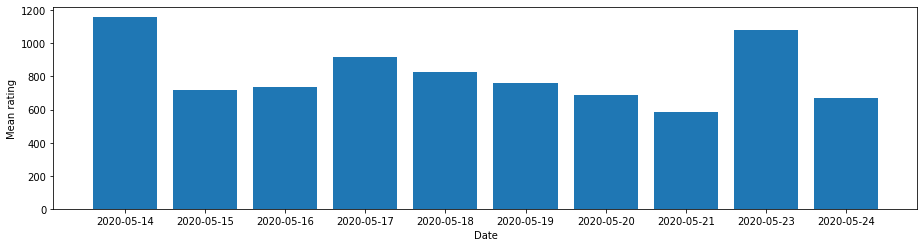

In [271]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 2, 0.7])
ax.set_ylabel('Mean rating')
ax.set_xlabel('Date')
ax.bar(x, y)
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [272]:
fig.savefig("./fig.pdf")  # matplotlib sucks

In [273]:
# !pip install bokeh

from bokeh.io import output_notebook, show, export_svg
from bokeh.plotting import figure

output_notebook()

p = figure(
    x_range=x,
    title="Mean rating by date",
    toolbar_location=None,
    tools="",
    height=300,
    width=800,
    x_axis_label="Date",
    y_axis_label="Mean rating"
)

p.vbar(x=x, top=y, width=0.6)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Loading BokehJS ...

In [275]:
# !pip install selenium
# !conda install -c conda-forge firefox geckodriver

export_svg(p, filename="./plot.svg")  # so much better now

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. <i>Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются. Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо</i>.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * Формат csv: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [324]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [325]:
def get_fall_courses_num(stud: pd.Series) -> int:
    courses_num: int = 1

    if stud["17_group"] in [171, 172, 173]:
        courses_num += 1

    if stud["18_group"] > 0 and stud.is_mi:
        courses_num += 1
    return courses_num


def get_spring_courses_num(stud: pd.Series) -> int:
    courses_num: int = 1

    if stud["17_group"] in [171, 172, 173]:
        courses_num += 1
    return courses_num

In [326]:
df["fall_courses_num"] = df.apply(get_fall_courses_num, axis=1)

Проверка:

In [327]:
col_name = "fall_courses_num"  # insert your new column name as str

assert (df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all(), "1"
assert (df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all(), "2"
assert (df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all(), "3"
assert (df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all(), "4"

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [328]:
# По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
# Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
# На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
# Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

def get_all_courses(df: pd.DataFrame, season: str = "fall") -> list:
    return [*set(df[[f"{season}_1", f"{season}_2", f"{season}_3"]].values.flatten())]


def get_fall_places_num(course: str) -> int:
    '''
    Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест),
    Анализа неструктурированных данных ($\infty$ мест)
    '''
    if course in ["Statistical Learning Theory", "Высокопроизводительные вычисления"]:
        return 60
    elif course == "Анализ неструктурированных данных":
        return 1_000_000  # i'm just too lazy to work with inf in python :-|
    else:
        return 30


def get_spring_places_num(course: str) -> int:
    """Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест)."""
    if course in ["Обучение с подкреплением", "Анализ данных в бизнесе"]:
        return 60
    else:
        return 30


def prepare_season_df(df: pd.DataFrame, season: str = "fall") -> pd.DataFrame:
    season_df = df[["id", "percentile", f"{season}_1", f"{season}_2", f"{season}_3", f"{season}_courses_num"]].copy()
    season_df["course1"] = "???"
    season_df["course2"] = "???"
    season_df.at[season_df[f"{season}_courses_num"] == 1, "course2"] = "-"
    season_df["all_chosen"] = False
    return season_df.set_index("id")


def calc_course_size(df: pd.DataFrame, course: str) -> int:
    size = 0
    counts = df.course1.value_counts(), df.course2.value_counts()

    if course in counts[0]:
        size += int(counts[0][course])
    if course in counts[1]:
        size += int(counts[1][course])
    return size


def run_first_wave(df: pd.DataFrame, season: str = "fall", add_percentile_places: bool = False) -> None:
    for course in get_all_courses(df, season=season):
        if season == "fall":
            course_places = get_fall_places_num(course)
        else:
            course_places = get_spring_places_num(course)

        wave_students = df[
            (df[f"{season}_1"] == course) |
            ((df[f"{season}_2"] == course) & (df[f"{season}_courses_num"] == 2))
            ]
        wave_students = wave_students.copy().sort_values(by="percentile")

        if len(wave_students) > course_places:
            wave_students = wave_students.head(course_places)

        wave_students.at[(wave_students.course2 == "???") & (wave_students.course1 != "???"), "course2"] = course
        wave_students.at[wave_students.course1 == "???", "course1"] = course

        df.loc[wave_students.index, "course1"] = wave_students.course1
        df.loc[wave_students.index, "course2"] = wave_students.course2

        df.loc[(df.course1 != "???") & (df[f"{season}_courses_num"] == 1), "all_chosen"] = True
        df.loc[(df.course2 != "???") & (df[f"{season}_courses_num"] == 2), "all_chosen"] = True

        if add_percentile_places:
            df.at[wave_students.iloc[0].name, "is_first_place"] = True
            df.at[wave_students.iloc[-1].name, "is_last_place"] = True


def run_second_wave(df: pd.DataFrame, season: str = "fall") -> None:
    for course in get_all_courses(df, season=season):
        course_places = get_fall_places_num(course)
        current_course_size = calc_course_size(df, course)

        if current_course_size < course_places:
            wave_students = df[
                (((df[f"{season}_3"] == course) & (df[f"{season}_courses_num"] == 2)) |
                 ((df[f"{season}_2"] == course) & (df[f"{season}_courses_num"] == 1))) &
                (df.all_chosen == False) &
                (df.course1 != course)
                ]
            wave_students = wave_students.copy().sort_values(by="percentile")

            if current_course_size + len(wave_students) > course_places:
                wave_students = wave_students.head(course_places - current_course_size)

            wave_students.at[(wave_students.course2 == "???") & (wave_students.course1 != "???"), "course2"] = course
            wave_students.at[wave_students.course1 == "???", "course1"] = course

            df.loc[wave_students.index, "course1"] = wave_students.course1
            df.loc[wave_students.index, "course2"] = wave_students.course2

            df.loc[(df.course1 != "???") & (df[f"{season}_courses_num"] == 1), "all_chosen"] = True
            df.loc[(df.course2 != "???") & (df[f"{season}_courses_num"] == 2), "all_chosen"] = True


def run_third_wave(df: pd.DataFrame, season: str = "fall") -> None:
    for course in get_all_courses(df, season=season):
        course_places = get_fall_places_num(course)
        current_course_size = calc_course_size(df, course)

        if current_course_size < course_places:
            wave_students = df[
                ((df[f"{season}_3"] == course) &
                 (df[f"{season}_courses_num"] == 1)) &
                (df.all_chosen == False) &
                (df.course1 != course)
                ]
            wave_students = wave_students.copy().sort_values(by="percentile")

            if current_course_size + len(wave_students) > course_places:
                wave_students = wave_students.head(course_places - current_course_size)

            wave_students.at[(wave_students.course2 == "???") & (wave_students.course1 != "???"), "course2"] = course
            wave_students.at[wave_students.course1 == "???", "course1"] = course

            df.loc[wave_students.index, "course1"] = wave_students.course1
            df.loc[wave_students.index, "course2"] = wave_students.course2

            df.loc[(df.course1 != "???") & (df[f"{season}_courses_num"] == 1), "all_chosen"] = True
            df.loc[(df.course2 != "???") & (df[f"{season}_courses_num"] == 2), "all_chosen"] = True

In [329]:
fall_df = prepare_season_df(df)
run_first_wave(fall_df, add_percentile_places=True)

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [335]:
def check_first_priority(df: pd.DataFrame, check_df: pd.DataFrame) -> None:
    """I didn't like how the old checking code work, so here is a new one"""
    d = df.sort_values(by="id").copy().fillna(False)
    cd = check_df.sort_values(by="id").copy().fillna(False)
    assert (d.is_first_place.values == cd.is_first_place.values).sum() == 347, "ошибочка"
    assert (d.is_last_place.values == cd.is_last_place.values).sum() == 347, "ошибочка"


def make_submission(df: pd.DataFrame) -> pd.DataFrame:
    res_df = df[["course1", "course2"]].copy()
    res_df.reset_index(inplace=True)
    res_df.columns = ["ID", "course1", "course2"]
    return res_df

In [331]:
# !wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')
check_first_priority(fall_df, check_df)

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [332]:
fall_df = prepare_season_df(df, season="fall")

run_first_wave(fall_df)
run_second_wave(fall_df)
run_third_wave(fall_df)

solution_df = make_submission(fall_df)

In [333]:
solution_df.to_csv("./solution.csv", index=None)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/29176/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

In [321]:
# sleep3r
# https://contest.yandex.ru/contest/29176/run-report/53519977/

*Дисклеймер:*

Контест выдаётся для самопроверки. Если ваша посылка получила ОК, то код, скорее всего, правильный. Но при этом оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [322]:
df["spring_courses_num"] = df.apply(get_spring_courses_num, axis=1)
spring_df = prepare_season_df(df, season="spring")

run_first_wave(spring_df, season="spring")
run_second_wave(spring_df, season="spring")
run_third_wave(spring_df, season="spring")

solution_df = make_submission(spring_df)

In [323]:
solution_df.to_csv("./spring_solution.csv", index=None)

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/29176/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: